<h1><center>Smart Cities in the World</center></h1>

## Content
### 1. Hypothesis
### 2. Libs importing & data loading
### 3. Data wrangling
### 4. EDA
### 5. Hypothesis consolidation & conclusion

### Audience:    
executive, technical, non-technica

### Completion  
A Jupyter notebook or PowerPoint that communicates a data story for the project and data wrangling work completed to date.  

### Skills  
- Ask questions about and explore data  
- identifying trends, correlations and making hypotheses  
        bar, histogram, scatter, trends, time series plot (if any), correlation  
- Using text and plots to communicate and present insights  

### Process and understanding  
- The submission shows that the student used effective questions and exploration of the data.  
- The submission shows that inferences, correlations, and/other relationships among the data were identified.  
- The submission shows that a hypothesis was developed & conclusion.  

### Presentation  
The project presentation demonstrates strong communication skills and presents insights using text and visuals.

### 1. Hypothesis
#### a. Key features describe (the higher the better):
Smart_Mobility: city-wide Public Transportation System, ICT, accessibility infrastructure.  
Smart_Environment: environmental sustainability impact, monitoring pollution and energy management.  
Smart_Government: transparent governance & open data initiatives of smart cities.                    
Smart_Economy: city-wide productivity, economic vitality, and support for.                    
Smart_People: social and cultural plurality, education systems and its supporting ancillary.   
Smart_Living: healthcare services, social security and housing quality.                      
SmartCity_Index: Aggregate score for smart city model based on smart city supergroups.  
SmartCity_Index_relative_Edmonton: normalized score to compare Edmonton (Alberta's capital) to the rest of the smart cities across the world.

#### b. Questions & Hypothesis
<i>Questions</i><br>
Where are the most smart cities located?  
Do they distibuted systematically?  
What are the gaps between the top & bottom smart cities groups?  
Which factors the bottom group need to improve?  

<i>Hypothetis</i><br>
The majority of smart cities in the top group located in North America and Northern Europe!

### 2. Libs importing & data loading

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight') #style form fivethirtyeight.com

import folium
from folium.plugins import FastMarkerCluster #display geography map

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #ignore depreciation warning

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
smart_cities = pd.read_csv('Smart_City_index_headers.csv')
cities = pd.read_csv('worldcities.csv')
continents = pd.read_csv('country_and_continent.csv')

### 3. Data wrangling

a. Smart cities dataset

In [3]:
smart_cities.isnull().sum()

Id                                   0
City                                 0
Country                              0
Smart_Mobility                       0
Smart_Environment                    0
Smart_Government                     0
Smart_Economy                        0
Smart_People                         0
Smart_Living                         0
SmartCity_Index                      0
SmartCity_Index_relative_Edmonton    0
dtype: int64

In [3]:
dict_rename = {'Smart_Mobility ': 'Smart_Mobility','Smart_Government ': 'Smart_Government',
    'Smart_Economy ': 'Smart_Economy'}
smart_cities.rename(columns=dict_rename, inplace=True)

In [5]:
smart_cities.head(2)

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823


b. World cities dataset

In [6]:
cities.isnull().sum()

city              0
city_ascii        0
lat               0
lng               0
country           0
iso2             31
iso3              0
admin_name       99
capital       31518
population      738
id                0
dtype: int64

In [4]:
# Remove non-important columns & rows which has nulll values
cities.drop(['iso2','admin_name','capital'],axis=1, inplace=True)
cities.dropna(axis=0,inplace=True)
cities.reset_index(drop=True, inplace=True)

In [8]:
# Re-Check null values by columns
cities.isnull().sum()

city          0
city_ascii    0
lat           0
lng           0
country       0
iso3          0
population    0
id            0
dtype: int64

In [9]:
cities.head(2)

,city,city_ascii,lat,lng,country,iso3,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JPN,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,IDN,34540000.0,1360771077


In [5]:
cities.drop_duplicates(['city','country'],inplace=True)

In [6]:
cities.city.value_counts()

Victoria                   8
San Francisco              8
San Juan                   7
Santa Cruz                 7
San Fernando               7
                          ..
Toguchin                   1
Lake Murray of Richland    1
Alcamo                     1
Oued Jdida                 1
Câmpeni                    1
Name: city, Length: 36799, dtype: int64

In [105]:
cities[cities['city'] == 'San Juan']

,city,city_ascii,lat,lng,country,iso3,population,id
1467,San Juan,San Juan,-31.5375,-68.5364,Argentina,ARG,471389.0,1032869625
1943,San Juan,San Juan,18.4037,-66.0636,Puerto Rico,PRI,323279.0,1630035577
3206,San Juan,San Juan,18.8100,-71.2300,Dominican Republic,DOM,169032.0,1214608846
3606,San Juan,San Juan,14.6000,121.0333,Philippines,PHL,122180.0,1608817515
6781,San Juan,San Juan,9.9609,-84.0731,Costa Rica,CRI,24944.0,1188421709
13960,San Juan,San Juan,26.1903,-98.1520,United States,USA,37008.0,1840022256
23124,San Juan,San Juan,10.6500,-61.4500,Trinidad And Tobago,TTO,13797.0,1780554728


c. Countries & continents dataset

In [10]:
continents.head(2)

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0


In [11]:
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Country_Name               262 non-null    object 
 3   Two_Letter_Country_Code    261 non-null    object 
 4   Three_Letter_Country_Code  258 non-null    object 
 5   Country_Number             258 non-null    float64
dtypes: float64(1), object(5)
memory usage: 12.4+ KB


In [5]:
continents['Continent_Name'].unique()

array(['Asia', 'Europe', 'Antarctica', 'Africa', 'Oceania',
       'North America', 'South America'], dtype=object)

In [13]:
continents['Continent_Code'].unique()

array(['AS', 'EU', 'AN', 'AF', 'OC', nan, 'SA'], dtype=object)

In [6]:
continents['Continent_Code'].fillna('NA',inplace=True)

In [8]:
continents[continents.isnull().any(axis=1)]

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
152,Africa,AF,"Namibia, Republic of",NaN,NAM,516.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN
261,Asia,AS,Spratly Islands,XS,NaN,NaN


In [7]:
continents.dropna(axis=0,inplace=True)
continents.reset_index(drop=True, inplace=True)

In [8]:
continents.drop(['Country_Number','Two_Letter_Country_Code'],axis=1, inplace=True)

In [11]:
continents['Three_Letter_Country_Code'].value_counts()

ARM    2
CYP    2
TUR    2
UMI    2
GEO    2
      ..
DMA    1
NER    1
BRN    1
DZA    1
YEM    1
Name: Three_Letter_Country_Code, Length: 249, dtype: int64

In [18]:
continents.isnull().sum()

Continent_Name               0
Continent_Code               0
Country_Name                 0
Three_Letter_Country_Code    0
dtype: int64

d. <b>Merging data</b><br>
World cities vs Countries continents

In [11]:
cities.head(2)

,city,city_ascii,lat,lng,country,iso3,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JPN,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,IDN,34540000.0,1360771077


In [12]:
continents.head(2)

,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code
0,Asia,AS,"Afghanistan, Islamic Republic of",AFG
1,Europe,EU,"Albania, Republic of",ALB


In [114]:
print(cities.shape,continents.shape)

(37892, 8) (257, 4)


In [9]:
cities_continents = pd.merge(cities, continents, left_on='iso3', right_on='Three_Letter_Country_Code')

In [10]:
cities_continents.drop(columns=['city', 'population', 'id', 'Continent_Code', 
  'Three_Letter_Country_Code'], inplace=True)

Smart cities vs Cities contients

In [14]:
print(smart_cities.shape,smart_cities.head(2))

(102, 11)    Id    City Country  Smart_Mobility  Smart_Environment  Smart_Government  \
0   1    Oslo  Norway            6480               6512              7516   
1   2  Bergen  Norway            7097               6876              7350   

   Smart_Economy  Smart_People  Smart_Living  SmartCity_Index  \
0           4565          8618          9090             7138   
1           4905          8050          9090             7296   

   SmartCity_Index_relative_Edmonton  
0                                666  
1                                823  


In [11]:
cities_continents.rename({'city_ascii': 'City', 'country': 'Country'}, axis=1, inplace=True)

In [16]:
print(cities_continents.shape,'\n',cities_continents.head(2))

(39729, 7) 
     City      lat       lng Country iso3 Continent_Name Country_Name
0  Tokyo  35.6897  139.6922   Japan  JPN           Asia        Japan
1  Osaka  34.7500  135.4601   Japan  JPN           Asia        Japan


In [12]:
smart_cities_continents = pd.merge(smart_cities,cities_continents, on=['City','Country'],how='left')

In [18]:
print(smart_cities_continents['Country'].sort_values().unique(),'\n',smart_cities['Country'].sort_values().unique())

['Australia' 'Austria' 'Belgium' 'Canada' 'China' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Hungary' 'Iceland'
 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia' 'Luxembourg' 'Malaysia'
 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Russia' 'Singapore'
 'Slovakia' 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Taiwan' 'United Arab Emirates' 'United Kingdom' 'United States'] 
 ['Australia' 'Austria' 'Belgium' 'Canada' 'China' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Hungary' 'Iceland'
 'Ireland' 'Israel' 'Italy' 'Japan' 'Latvia' 'Luxembourg' 'Malaysia'
 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Russia' 'Singapore'
 'Slovakia' 'Slovenia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Taiwan' 'United Arab Emirates' 'United Kingdom' 'United States']


In [19]:
smart_cities_continents.City.value_counts()

Moscow               2
Daejeon              1
Vantaa               1
Jyväskylä            1
Adelaide             1
                    ..
Frankfurt am Main    1
Abu Dhabi            1
Västerås             1
Hannover             1
Melbourne            1
Name: City, Length: 102, dtype: int64

In [20]:
smart_cities_continents.head(2)

,Id,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton,lat,lng,iso3,Continent_Name,Country_Name
0,1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138,666,59.9111,10.7528,NOR,Europe,"Norway, Kingdom of"
1,2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296,823,60.3925,5.3233,NOR,Europe,"Norway, Kingdom of"


In [13]:
smart_cities_continents.drop(['Id', 'Country_Name'], axis=1, inplace=True)

In [14]:
value_count = smart_cities_continents['City'].value_counts()
for key,val in value_count.items():  
  if val > 1:
    print(key, val)

Moscow 2


In [60]:
smart_cities_continents[smart_cities_continents['City'] =='Moscow']

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,SmartCity_Index,SmartCity_Index_relative_Edmonton,lat,lng,iso3,Continent_Name
96,Moscow,Russia,5015,2772,5078,5030,4143,4100,4365,-2108,55.7558,37.6178,RUS,Europe
97,Moscow,Russia,5015,2772,5078,5030,4143,4100,4365,-2108,55.7558,37.6178,RUS,Asia


In [14]:
smart_cities_continents.drop(smart_cities_continents[(smart_cities_continents['City']=='Moscow')&\
  (smart_cities_continents['Continent_Name']=='Asia')].index,inplace=True)
smart_cities_continents.reset_index(drop=True, inplace=True)

In [15]:
#Total smart points column, exclude SmartCity_Index
smart_cities_continents['Smart_Total'] = smart_cities_continents.iloc[:,2:8].sum(axis=1)

In [16]:
smart_cities_continents = smart_cities_continents[['City','Country','Smart_Mobility','Smart_Environment',
	'Smart_Government','Smart_Economy','Smart_People','Smart_Living','Smart_Total','SmartCity_Index',
  'SmartCity_Index_relative_Edmonton','lat','lng','iso3','Continent_Name']]

In [65]:
smart_cities_continents[smart_cities_continents.isnull().any(axis=1)]

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,Smart_Total,SmartCity_Index,SmartCity_Index_relative_Edmonton,lat,lng,iso3,Continent_Name
12,Västerås,Sweden,4683,8296,7840,5980,7065,7730,41594,6771,299,NaN,NaN,NaN,NaN
15,"Washington, DC",United States,6848,5224,7474,8590,5930,6220,40286,6662,190,NaN,NaN,NaN,NaN
25,Düsseldorf,Germany,6658,7756,5040,6700,6703,5690,38547,6455,-17,NaN,NaN,NaN,NaN
42,Frankfurt am Main,Germany,5487,7650,6196,7600,4868,5690,37491,6185,-288,NaN,NaN,NaN,NaN
48,Hämeenlinna,Finland,4567,6746,6512,8400,4590,8710,39525,6503,31,NaN,NaN,NaN,NaN
54,Jyväskylä,Finland,3900,6624,5852,8175,6388,8710,39649,6448,-24,NaN,NaN,NaN,NaN
62,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,31109,5314,-1158,NaN,NaN,NaN,NaN
71,Seoul,South Korea,6250,3754,5222,1490,7860,4710,29286,4967,-1505,NaN,NaN,NaN,NaN
85,Tel Aviv,Israel,4160,4354,7394,6120,4113,2360,28501,4540,-1933,NaN,NaN,NaN,NaN
86,Hong Kong,China,6143,3340,4984,4780,4385,1980,25612,4313,-2160,NaN,NaN,NaN,NaN


e. Missing value imputation

In [17]:
#Missing fields: lat, long, iso3, continent for 14 rows
lat_long = [[59.6099, 16.5448,'SWE','Europe'],[38.9072, 77.0369,'USA','North America'],[51.2277, 6.7735,'DEU','Europe'],
  [50.1109,8.6821,'DEU','Europe'],[60.9929,24.4590,'FIN','Europe'],[62.2426,25.7473,'FIN','Europe'],
  [36.3504,127.3845,'KOR','Asia'],[37.5665,126.9780,'KOR','Asia'],[32.0853, 34.7818,'ISR','Asia'],
  [22.3193,114.1694,'CHN','Asia'],[50.0755,14.4378,'CZE','Europe'],[3.1390,101.6869,'MYS','Asia'],
  [44.4056,8.9463,'ITA','Europe'],[59.9311,30.3609,'RUS','Europe']]

In [18]:
b = pd.DataFrame(lat_long,columns=['lat','lng','iso3','Continent_Name'])
b

,lat,lng,iso3,Continent_Name
0,59.6099,16.5448,SWE,Europe
1,38.9072,77.0369,USA,North America
2,51.2277,6.7735,DEU,Europe
3,50.1109,8.6821,DEU,Europe
4,60.9929,24.4590,FIN,Europe
5,62.2426,25.7473,FIN,Europe
6,36.3504,127.3845,KOR,Asia
7,37.5665,126.9780,KOR,Asia
8,32.0853,34.7818,ISR,Asia
9,22.3193,114.1694,CHN,Asia


In [19]:
a = smart_cities_continents[smart_cities_continents['lat'].isnull()]

In [20]:
for val in ['lat','lng','iso3','Continent_Name']:
  a[str(val)] = list(b[str(val)])

C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
smart_cities_continents.dropna(axis=0,inplace=True)
smart_cities_continents[smart_cities_continents['lat'].isnull()]

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,Smart_Total,SmartCity_Index,SmartCity_Index_relative_Edmonton,lat,lng,iso3,Continent_Name


In [22]:
#Final dataset for EDA
smart_cities_continents = pd.concat([smart_cities_continents,a],axis=0,ignore_index=True)
smart_cities_continents.reset_index(drop=True, inplace=True)

In [88]:
smart_cities_continents[smart_cities_continents.iso3 == 'KOR']

,City,Country,Smart_Mobility,Smart_Environment,Smart_Government,Smart_Economy,Smart_People,Smart_Living,Smart_Total,SmartCity_Index,SmartCity_Index_relative_Edmonton,lat,lng,iso3,Continent_Name
94,Daejeon,South Korea,7018,4192,4304,2250,8635,4710,31109,5314,-1158,36.3504,127.3845,KOR,Asia
95,Seoul,South Korea,6250,3754,5222,1490,7860,4710,29286,4967,-1505,37.5665,126.9780,KOR,Asia


### 4. EDA

In [90]:
#Geography displaying all smart cities over contients
map = folium.Map(location=(29, 100), zoom_start=3)
FastMarkerCluster(data=smart_cities_continents[['lat', 'lng']]).add_to(map)
folium.LayerControl().add_to(map)
map

Europe posseses a dominent number of smart cities than any other continent. Let's dig deeper to reveal how quality the cities are distributed

<AxesSubplot:>

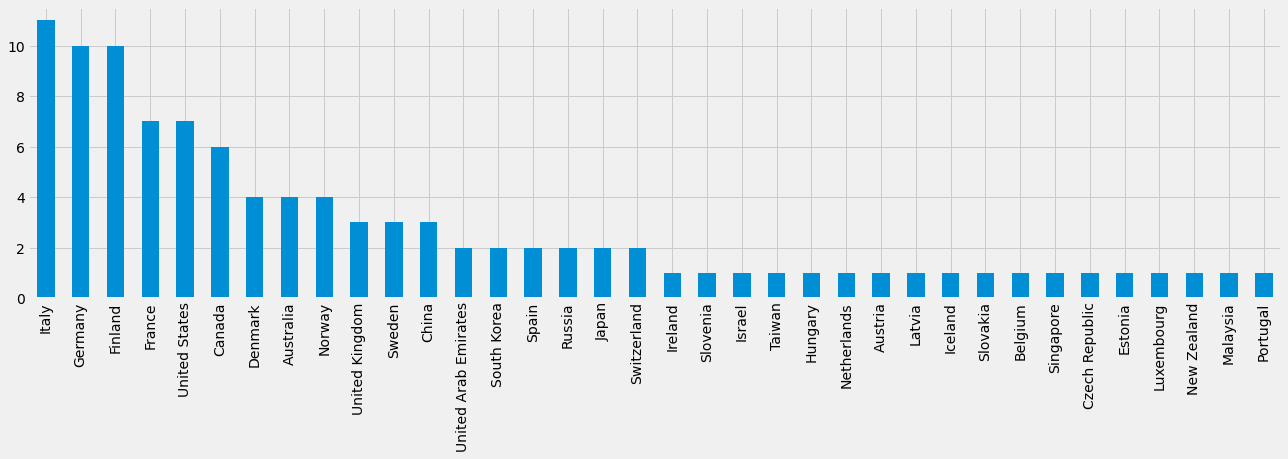

In [63]:
plt.figure(figsize=(20,5))
smart_cities_continents.Country.value_counts().plot(kind='bar')

The bar graph shows which countries has most cities representation.
- Italy has most number of smart cities.
- Portugal has least number of smart citites.

In [60]:
#Sorting cities by Smart_Total feature
scc_st = smart_cities_continents.sort_values(by=['Smart_Total'], ascending=False)
scc_st.reset_index(drop=True, inplace=True)
pos = scc_st[scc_st['City'] == 'Edmonton'].index
pos[0]

33

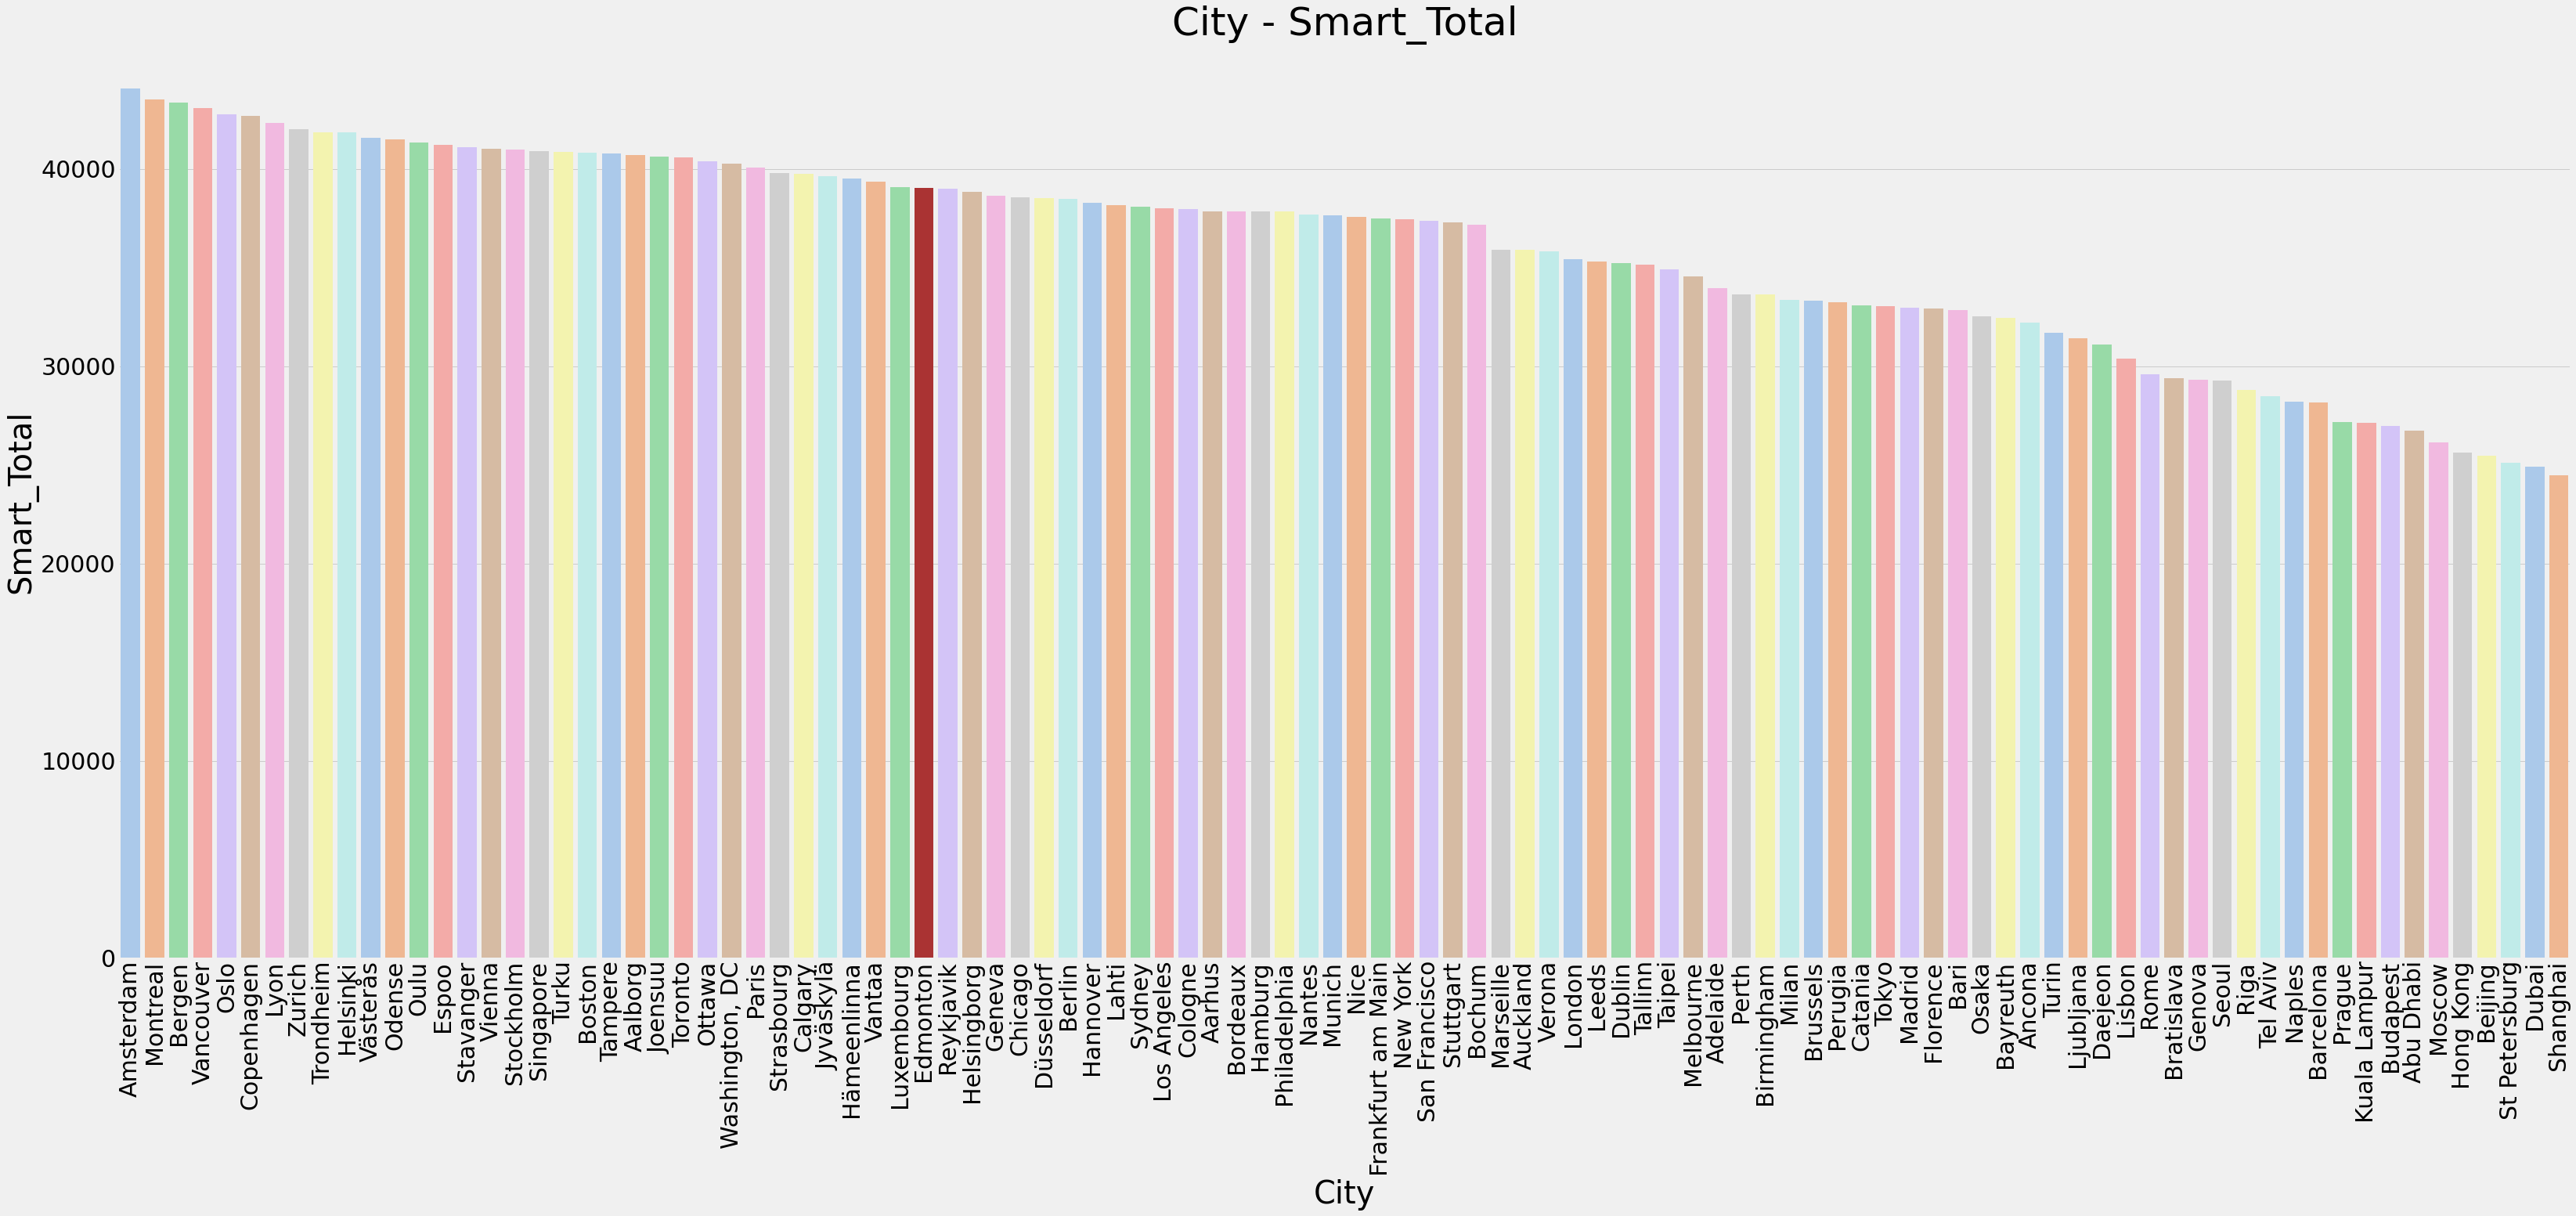

In [61]:
#102 cities ranking by Smart_Total feature
plt.figure(figsize=(50,20))
ax = sns.barplot(data=scc_st, x='City', y='Smart_Total', palette='pastel')
plt.xticks(fontsize=30,rotation=90)
plt.xlabel('City',fontsize=40)
plt.yticks(fontsize=30)
plt.ylabel('Smart_Total',fontsize=40)
plt.title('City - Smart_Total',fontsize=50)

#Edmonton is highlighted for reference to other cities
ax.patches[pos[0]].set_facecolor('#aa3333')

plt.show()

C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


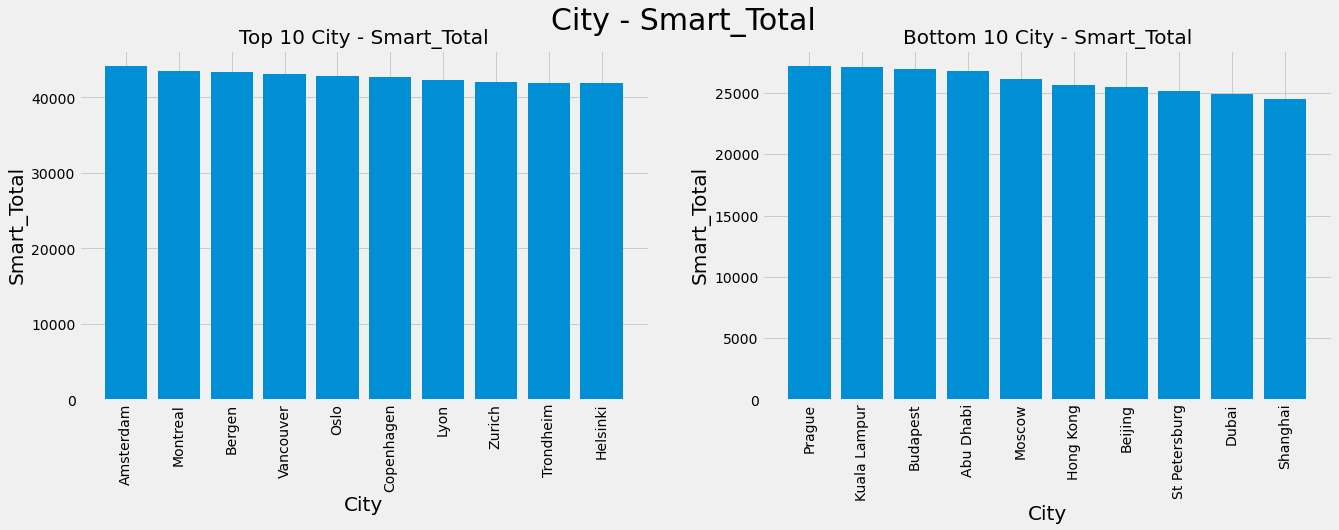

In [38]:
#Display top & bottom 10 smart cities ranked by Smart_Total
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.suptitle('City - Smart_Total', fontsize=30)
fig.set_size_inches(20, 6)


#Top 10 smart cities ranked by Smart_Total
top_smart_tol = smart_cities_continents.sort_values(by=['Smart_Total'], ascending=False)[:10]

ax1.bar(top_smart_tol['City'], top_smart_tol['Smart_Total'])
ax1.set_xlabel('City',fontsize=20)
ax1.set_ylabel('Smart_Total',fontsize=20)
ax1.set_title('Top 10 City - Smart_Total',fontsize=20)
ax1.set_xticklabels(list(top_smart_tol["City"]), rotation=90)


#Bottom 10 smart cities ranked by Smart_Total
bot_smart_tol = smart_cities_continents.sort_values(by=['Smart_Total'], ascending=False)[-10:]

ax2.bar(bot_smart_tol['City'], bot_smart_tol['Smart_Total'])
ax2.set_xlabel('City',fontsize=20)
ax2.set_ylabel('Smart_Total',fontsize=20)
ax2.set_title('Bottom 10 City - Smart_Total',fontsize=20)
ax2.set_xticklabels(list(bot_smart_tol['City']), rotation=90)

plt.show()

All the best smart cities are in Northen & Mid Europe and Canada. And most of the bottom in the list of smart cities are in Asia & Eastern Europe. It seems that the Eastern hemisphere quite abit behind the western one

In [219]:
#Filter out top & bottom 10 cities ranked by the rest of 6 smart features
title_top = 'Top 10 smart cities'
title_bot = 'Bottom 10 smart cities'
data_top = [0] * 6
data_bot = [0] * 6
smart_features = ["Smart_Mobility","Smart_Environment","Smart_Government","Smart_Economy","Smart_People","Smart_Living"]
for i,val in enumerate(smart_features):
  data_top[i] = smart_cities_continents.sort_values([val],ascending=False)[:10]
  data_bot[i] = smart_cities_continents.sort_values([val],ascending=False)[-10:]

In [214]:
def six_plots(data,title):
  fig, ax = plt.subplots(nrows=2, ncols=3)
  fig.suptitle(title, fontsize=30)
  fig.set_size_inches(18, 18)

  features = ["Smart_Mobility","Smart_Environment","Smart_Government","Smart_Economy","Smart_People","Smart_Living"]
  for i in range(6):
    if i < 3: 
      ax[0,i].bar(data[i]["City"], data[i][features[i]], align='edge', width=-0.4)
      ax[0,i].set_ylabel(features[i])
      ax[0,i].set_title(features[i])
      ax[0,i].set_xticklabels(list(data[i]["City"]), rotation=90)
    if i >= 3: 
      ax[1,i-3].bar(data[i]["City"], data[i][features[i]], align='edge', width=-0.4)    
      ax[1,i-3].set_ylabel(features[i])
      ax[1,i-3].set_title(features[i])
      ax[1,i-3].set_xticklabels(list(data[i]["City"]), rotation=90)
      
  plt.tight_layout()
  plt.show()

C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


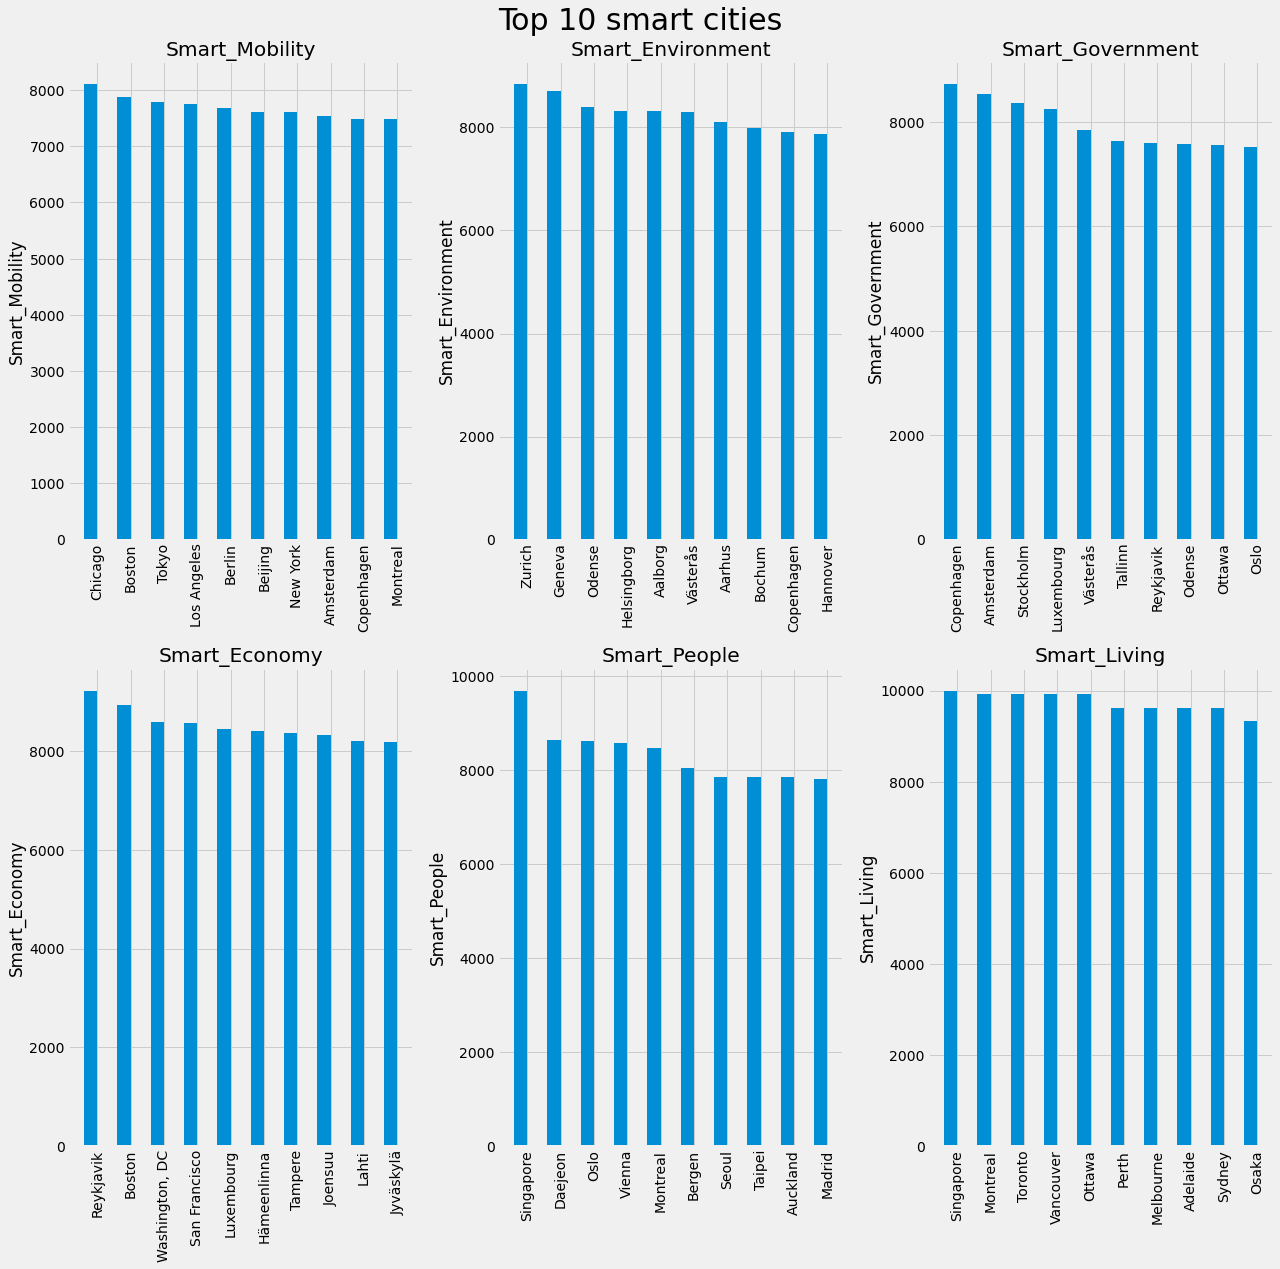

In [217]:
#Top 10 smart cities
six_plots(data_top,title_top)

The fluxtuation in quantity of smart indexes among cities in top 10 group is quite narrow. Except, Smart_People index of Sigapore is remarkable higher than others. The cities are mainly located in North America & Western Europe. Singapore is the leader in 02 key important indexes of Smart_People & Smart_Living of which these indexes are considered as the stable & longterm growth factors.

C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]
C:\Users\Binhkn\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


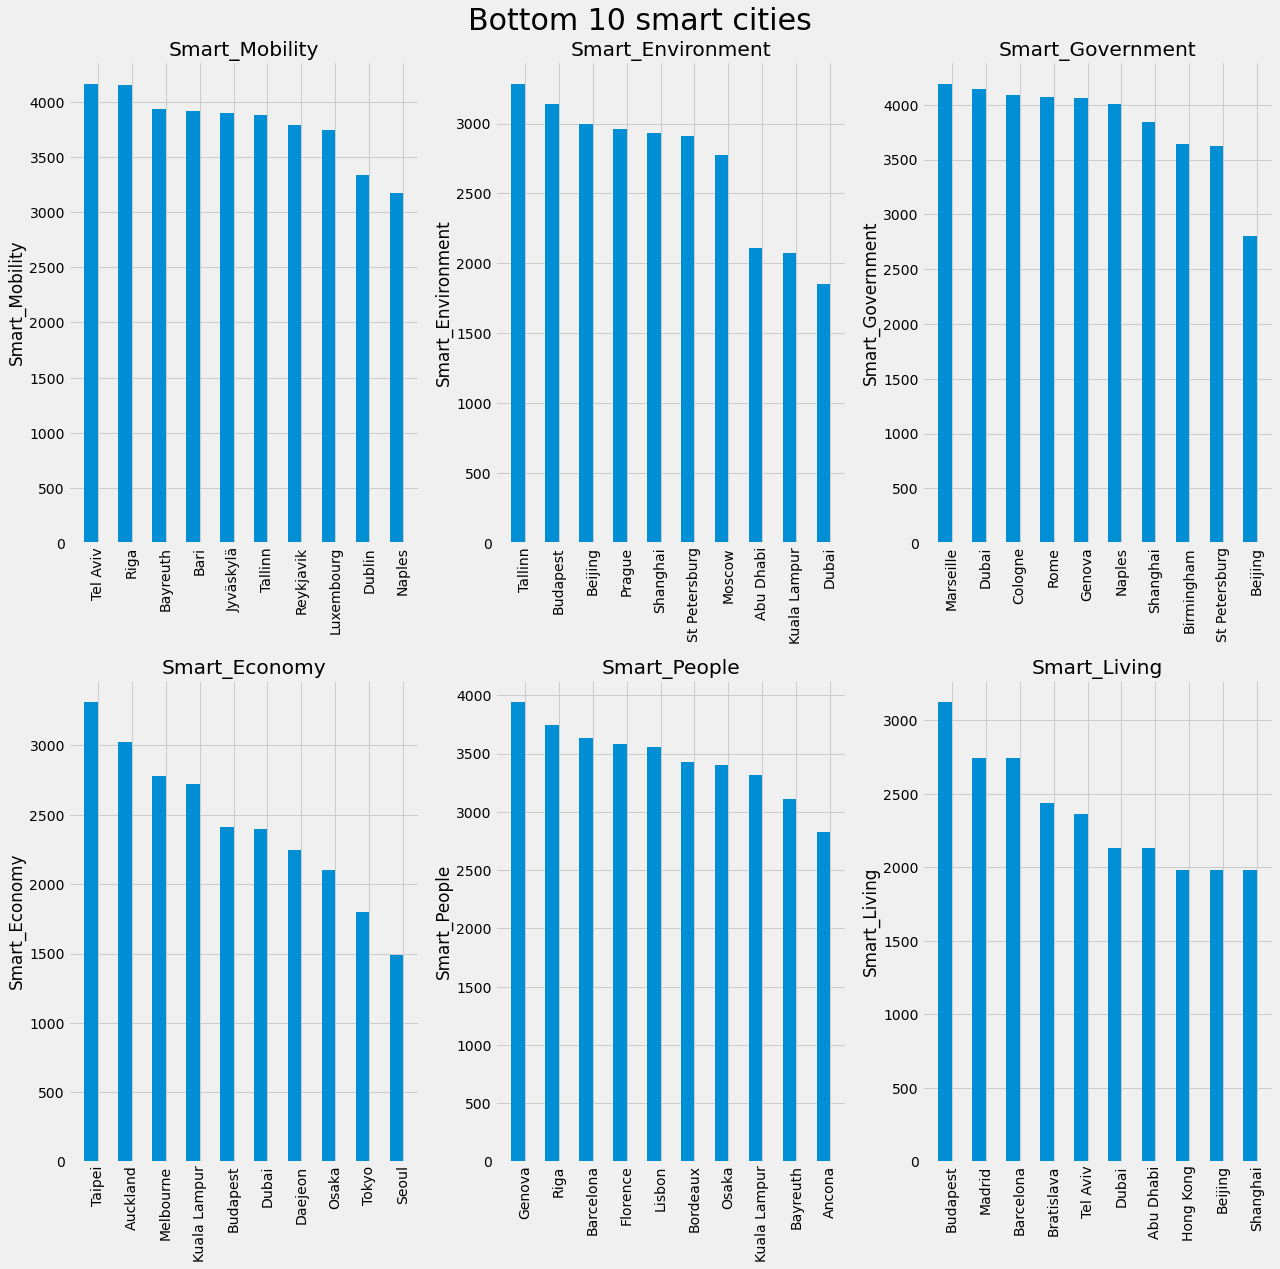

In [220]:
#Bottom 10 smart cities
six_plots(data_bot,title_bot)

Meanwhile, the difference in quantity of smart indexes among cities in bottom 10 group is quite large. The last 03 cities in the bottom 10 cities' group showing a significant distal distance to improve their own indexes in order to catch the others in the group, not the mid & top ones.

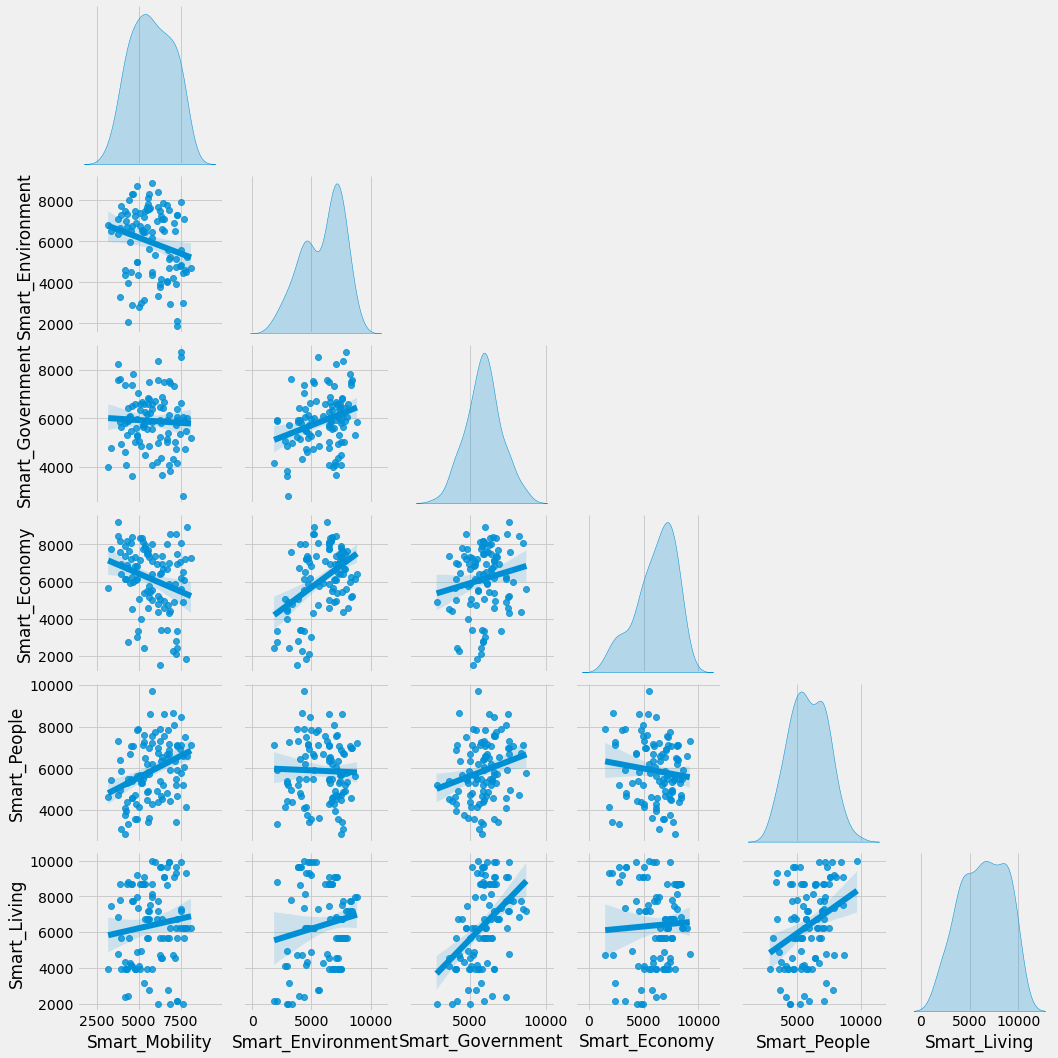

In [72]:
smart_features = ["Smart_Mobility","Smart_Environment","Smart_Government","Smart_Economy","Smart_People","Smart_Living"]

sns.pairplot(smart_cities_continents, vars=smart_features, diag_kind='kde', kind='reg',corner=True)

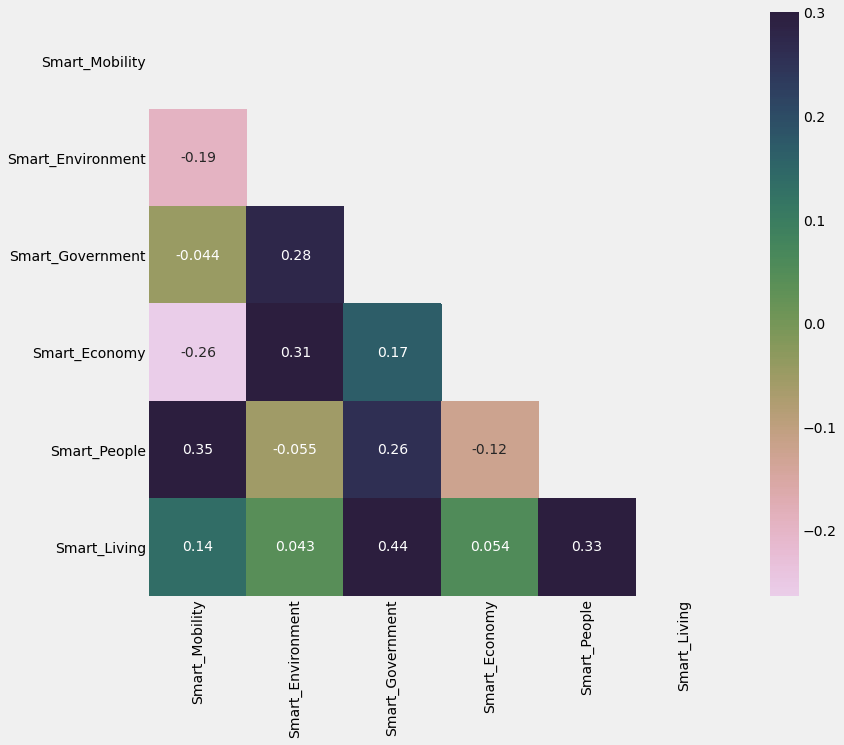

In [69]:
scc_cor = smart_cities_continents[smart_features]

# Generate a mask for the upper triangle
mask = np.zeros_like(scc_cor.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(scc_cor.corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=.3, square=True)

plt.show()

There are some hidden correlation have been revealed here:
- Smart_Economy & Smart_Environment have fair relationship to Smart_Government. It makes sence in reality  
- Smart_Living is related to Smart_People, Smart_Government & Smart_Mobility

Interestingly the negative relationship between Smart_Economy and Smart_Mobility indexes, this needs a deeper investigation and ofcourse more data to explain.

### 5. Hypothesis consolidation & conclusion  
The statistics & graphes show a gap differentiate the world's smart cities to the western & eastern hemisphere in both quantity & quality.  
Smart cities are dominantly located in the Western Europe & North America countries which have a long history of science & technical development.  
The role of Government in managing efficiently its own resource is the key for the high ranking position.  
There are several special cases: Singapore, Taiwan, Korea South & Japan which reach high positions in the top 10 group, these could be the examples for other countries to follow.